### Importing all files and check files

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [5]:
!pip install PySastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [6]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
# !git clone https://github.com/JoseBenaya/binar-gold-challenge

In [8]:
df_abusive = pd.read_csv('/content/drive/MyDrive/Binar Academy/Data Science Bootcamp/Gold Level Challenge/[Upload_Collab]Dataset/abusive.csv')
df_abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [9]:
df_data = pd.read_csv("/content/drive/MyDrive/Binar Academy/Data Science Bootcamp/Gold Level Challenge/[Upload_Collab]Dataset/data.csv",encoding='latin-1')

In [10]:
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


### Data Cleaning

In [11]:
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [13]:
# apply column total_word and total_char
df_data['total_char']=df_data.Tweet.apply(len)
df_data['total_word']= df_data.Tweet.apply(lambda x: len(x.split()))

In [14]:
df_data["Tweet"].head()

0    - disaat semua cowok berusaha melacak perhatia...
1    RT USER: USER siapa yang telat ngasih tau elu?...
2    41. Kadang aku berfikir, kenapa aku tetap perc...
3    USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4    USER USER Kaum cebong kapir udah keliatan dong...
Name: Tweet, dtype: object

In [15]:
df_stopwords = pd.read_csv("/content/drive/MyDrive/Binar Academy/Data Science Bootcamp/Gold Level Challenge/[Upload_Collab]Dataset/stopwordbahasa.csv", header=None)

In [16]:
df_stopwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       758 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [17]:
# importing stopwords
df_stopwords=df_stopwords.rename(columns={0: 'stopword'})
df_stopwords.head(10)

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak
5,agaknya
6,agar
7,akan
8,akankah
9,akhir


In [18]:
df_stopwords.loc[len(df_stopwords.index)] = ['sih']

In [19]:
df_stopwords[df_stopwords['stopword'] == 'sih']

,stopword
758,sih


In [20]:
# lower case all value
df_data["Tweet"].str.lower()

0        - disaat semua cowok berusaha melacak perhatia...
1        rt user: user siapa yang telat ngasih tau elu?...
2        41. kadang aku berfikir, kenapa aku tetap perc...
3        user user aku itu aku\n\nku tau matamu sipit t...
4        user user kaum cebong kapir udah keliatan dong...
                               ...                        
13164    user jangan asal ngomong ndasmu. congor lu yg ...
13165                         user kasur mana enak kunyuk'
13166    user hati hati bisu :( .g\n\nlagi bosan huft \...
13167    user user user user bom yang real mudah terdet...
13168    user mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, Length: 13169, dtype: object

In [21]:
df_data.shape

(13169, 15)

####Handling Duplicate Data

In [22]:
duplicate_tweet = df_data[df_data.duplicated(['Tweet'])]
duplicate_tweet

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
295,#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 ...,0,0,0,0,0,0,0,0,0,0,0,0,246,24
378,#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 ...,0,0,0,0,0,0,0,0,0,0,0,0,246,24
1433,"perempuan kaya lo mending mati aja deh, jelek ...",1,1,1,0,0,0,1,1,0,1,0,0,81,15
1559,Presiden yang anda tuduh Rezim anti Islam suda...,1,0,1,0,0,0,0,0,1,1,0,0,117,19
1565,USER USER USER USER USER USER USER USER USER U...,0,0,0,0,0,0,0,0,0,0,0,0,104,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12933,"RT USER: USER Heran juga saya, setan iblis pad...",1,1,1,0,0,0,0,0,1,1,0,0,141,24
12952,USER USER USER USER USER USER USER USER USER U...,0,0,0,0,0,0,0,0,0,0,0,0,104,21
12953,"SETUJU SAYA,KLAU AHOK DAPAT GELAR SANTRI KEHOR...",1,1,1,0,0,0,0,0,1,1,0,0,91,12
12985,USER ahmad dhani yang terhormat paling babi pa...,1,1,1,0,0,0,0,1,0,1,0,0,122,20


In [23]:
df_data = df_data.drop_duplicates(subset='Tweet', keep='first').reset_index()
df_data.shape

(13023, 16)

In [24]:
# import kamusalay.csv for cleaning data
df_kamusalay=pd.read_csv("/content/drive/MyDrive/Binar Academy/Data Science Bootcamp/Gold Level Challenge/[Upload_Collab]Dataset/new_kamusalay.csv", encoding="latin-1", header= None)
df_kamusalay=df_kamusalay.rename(columns={0: 'original',
                                      1: 'replacement'})

In [25]:
df_kamusalay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15167 entries, 0 to 15166
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   original     15167 non-null  object
 1   replacement  15167 non-null  object
dtypes: object(2)
memory usage: 237.1+ KB


In [26]:
df_kamusalay.head()

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [27]:
# import regEx
import re

# custom functional for preprocess data

# lower case all data
def lowercase_data (text):
  return text.lower()

# remove unnecessary character
def remove_unnecessary_char(text):
    text = re.sub(r'pic.twitter.com.[\w]+', '', text) # Remove every pic
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub(':', ' ', text)
    text = re.sub(';', ' ', text)
    text = re.sub('\\+n', ' ', text)
    text = re.sub('\\+', ' ', text)
    text = re.sub(r'‚Ä¶', '', text)

    to_delete = ['hypertext', 'transfer', 'protocol', 'over', 'secure', 'socket', 'layer', 'dtype', 'tweet', 'name', 'object'
                 ,'twitter','com', 'pic', ' ya ', 'uniform', 'resource', 'locator']

    for word in to_delete:
        text = re.sub(word,'', text)
        text = re.sub(word.upper(),' ',text)

    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

# remove characters and numbers
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text

# remove stopwords
def remove_stopword(text):
    text = ' '.join(['' if word in df_stopwords.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

# hapus emoticon
def remove_emoticon_byte(text):
    text = text.replace("\\", " ")
    text = re.sub('x..', ' ', text)
    text = re.sub(' n ', ' ', text)
    text = re.sub('\\+', ' ', text)
    text = re.sub('  +', ' ', text)
    return text

# normalize "alay" word
alay_dict_map = dict(zip(df_kamusalay['original'], df_kamusalay['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# ubah jadi kata dasar
def stemming(text):
    return stemmer.stem(text)

In [28]:
# check all function
print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase_data("Halooo, duniaa!"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))
print("remove_stopword: ", remove_stopword("ada hehe adalah huhu yang hehe"))
print("remove_emoticon_byte: ", remove_emoticon_byte('gue jari gue ukur nyali bacot xf0 x9f x98 x8f'))
print("stemming: ", stemming('kaum cebong kapir udah keliatan dong'))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis
remove_stopword:  hehe huhu hehe
remove_emoticon_byte:  gue jari gue ukur nyali bacot 
stemming:  kaum cebong kapir udah liat dong


In [29]:
# apply all function
def preprocess(text):
    text = lowercase_data(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 3
    text = normalize_alay(text) # 4
    text = remove_stopword(text) # 5
    text = remove_emoticon_byte(text) # 6
    text = stemming(text) #7
    return text

In [30]:
df_data['Tweet'] = df_data['Tweet'].apply(preprocess)

In [31]:
df_data.head(20)

,index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,0,cowok usaha lacak perhati gue lantas remeh per...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,1,telat tau edan sarap gue gaul ciga ifla cal licew,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,3,ku tau mata sipit,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,4,kaum cebong kafir dongok dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,89,14
5,5,bani taplak kawan kawan,1,1,0,1,0,0,0,0,1,0,1,0,73,6
6,6,deklarasi pilih kepala daerah 2018 aman anti h...,0,0,0,0,0,0,0,0,0,0,0,0,64,11
7,7,gue selesai re watch aldnoah zero kampret 2 ka...,0,1,0,0,0,0,0,0,0,0,0,0,129,20
8,8,admin belanja po baik nak makan ais kepal milo...,0,0,0,0,0,0,0,0,0,0,0,0,231,42
9,9,enak ngewe,0,1,0,0,0,0,0,0,0,0,0,0,29,6


### Exploratory Data Analysis

In [32]:
# mean for df_data
df_data.mean()

<ipython-input-32-135973464c31>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.mean()


index            6566.263457
HS                  0.422407
Abusive             0.383322
HS_Individual       0.270905
HS_Group            0.151501
HS_Religion         0.060278
HS_Race             0.043154
HS_Physical         0.024495
HS_Gender           0.023267
HS_Other            0.283806
HS_Weak             0.256162
HS_Moderate         0.130078
HS_Strong           0.036167
total_char        114.110343
total_word         17.259541
dtype: float64

In [33]:
# median for df_data

df_data.median()

<ipython-input-33-92a9132adc28>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.median()


index            6553.0
HS                  0.0
Abusive             0.0
HS_Individual       0.0
HS_Group            0.0
HS_Religion         0.0
HS_Race             0.0
HS_Physical         0.0
HS_Gender           0.0
HS_Other            0.0
HS_Weak             0.0
HS_Moderate         0.0
HS_Strong           0.0
total_char        100.0
total_word         15.0
dtype: float64

In [34]:
# mode for total char and total word

print('Mode total char: {}'.format(df_data['total_char'].mode()))
print('Mode total word: {}'.format(df_data['total_word'].mode()))

Mode total char: 0    254
Name: total_char, dtype: int64
Mode total word: 0    11
Name: total_word, dtype: int64


In [35]:
# spread for total char and total word

range_total_char = df_data.total_char.max() - df_data.total_char.min()
print('spread for total char: {}'.format(range_total_char))
range_total_word = df_data.total_word.max() - df_data.total_word.min()
print('spread for total word: {}'.format(range_total_word))

spread for total char: 557
spread for total word: 51


####Check Outlier

In [36]:
#quartile dan interquartile range for total char

#cari nilai minimum
p0_char = df_data.total_char.min()

#cari nilai maximum
p100_char = df_data.total_char.max()

#cari quartile 1
q1_char = df_data.total_char.quantile(0.25)

#cari quartile 2
q2_char = df_data.total_char.quantile(0.5)

#cari quartile 3
q3_char = df_data.total_char.quantile(0.75)

#cari IQR
iqr_char = q3_char - q1_char

#cari batas bawah
lower_limit_char = q1_char - 1.5 * iqr_char

#cari batas atas
upper_limit_char = q3_char + 1.5 * iqr_char

In [37]:
print("batas bawah (minimum) total_char : ", lower_limit_char)
print("nilai terkecil :", p0_char)

if lower_limit_char < p0_char:
  print("tidak ada outlier dari sisi batas bawah")
else:
  print("ada outlier dari sisi batas bawah")

print()

print("batas atas (maximum) total_char : ", upper_limit_char)
print("nilai terbesar", p100_char)

if upper_limit_char > p100_char:
  print("tidak ada outlier dari sisi batas atas")
else:
  print("ada outlier dari sisi batas atas")

batas bawah (minimum) total_char :  -80.5
nilai terkecil : 4
tidak ada outlier dari sisi batas bawah

batas atas (maximum) total_char :  291.5
nilai terbesar 561
ada outlier dari sisi batas atas


In [38]:
#quartile dan interquartile range for total word

#cari nilai minimum
p0_word = df_data.total_word.min()

#cari nilai maximum
p100_word = df_data.total_word.max()

#cari quartile 1
q1_word = df_data.total_word.quantile(0.25)

#cari quartile 2
q2_word = df_data.total_word.quantile(0.5)

#cari quartile 3
q3_word = df_data.total_word.quantile(0.75)

#cari IQR
iqr_word = q3_word - q1_word

#cari batas bawah
lower_limit_word = q1_word - 1.5 * iqr_word

#cari batas atas
upper_limit_word = q3_word + 1.5 * iqr_word

In [39]:
print("batas bawah (minimum) total_word : ", lower_limit_word)
print("nilai terkecil :", p0_word)

if lower_limit_word < p0_char:
  print("tidak ada outlier dari sisi batas bawah")
else:
  print("ada outlier dari sisi batas bawah")

print()

print("batas atas (maximum) total_word : ", upper_limit_word)
print("nilai terbesar", p100_word)

if upper_limit_word > p100_word:
  print("tidak ada outlier dari sisi batas atas")
else:
  print("ada outlier dari sisi batas atas")

batas bawah (minimum) total_word :  -12.0
nilai terkecil : 1
tidak ada outlier dari sisi batas bawah

batas atas (maximum) total_word :  44.0
nilai terbesar 52
ada outlier dari sisi batas atas


In [40]:
outlier = round((len(df_data[df_data['total_word'] > upper_limit_word]) / len(df_data) * 100), 2)
print(f'Persentase outlier: {outlier}%')

Persentase outlier: 0.65%


In [41]:
# variance and standard deviation
print(df_data.var())

index            1.446805e+07
HS               2.439980e-01
Abusive          2.364044e-01
HS_Individual    1.975308e-01
HS_Group         1.285585e-01
HS_Religion      5.664889e-02
HS_Race          4.129529e-02
HS_Physical      2.389695e-02
HS_Gender        2.272694e-02
HS_Other         2.032756e-01
HS_Weak          1.905577e-01
HS_Moderate      1.131661e-01
HS_Strong        3.486142e-02
total_char       4.777122e+03
total_word       1.049466e+02
dtype: float64


<ipython-input-41-8efa3a10b873>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_data.var())


In [42]:
# standard deviation
print(df_data.std())

index            3803.689410
HS                  0.493962
Abusive             0.486214
HS_Individual       0.444444
HS_Group            0.358550
HS_Religion         0.238010
HS_Race             0.203212
HS_Physical         0.154586
HS_Gender           0.150755
HS_Other            0.450861
HS_Weak             0.436529
HS_Moderate         0.336402
HS_Strong           0.186712
total_char         69.116728
total_word         10.244345
dtype: float64


<ipython-input-42-4decd517e25c>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_data.std())


In [43]:
df_data.describe()

,index,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
count,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000
mean,6566.263457,0.422407,0.383322,0.270905,0.151501,0.060278,0.043154,0.024495,0.023267,0.283806,0.256162,0.130078,0.036167,114.110343,17.259541
std,3803.689410,0.493962,0.486214,0.444444,0.358550,0.238010,0.203212,0.154586,0.150755,0.450861,0.436529,0.336402,0.186712,69.116728,10.244345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,3268.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,9.000000
50%,6553.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,15.000000
75%,9859.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,152.000000,23.000000
max,13168.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,561.000000,52.000000


In [44]:
df_data.skew()

<ipython-input-44-7ccd5dcb7967>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.skew()


index            0.006291
HS               0.314216
Abusive          0.480019
HS_Individual    1.031085
HS_Group         1.944230
HS_Religion      3.695551
HS_Race          4.496927
HS_Physical      6.152908
HS_Gender        6.325602
HS_Other         0.959177
HS_Weak          1.117338
HS_Moderate      2.199628
HS_Strong        4.969194
total_char       0.693347
total_word       0.790270
dtype: float64

In [45]:
df_data.kurtosis()

<ipython-input-45-9576311ef0ec>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.kurtosis()


index            -1.200542
HS               -1.901560
Abusive          -1.769853
HS_Individual    -0.937009
HS_Group          1.780304
HS_Religion      11.658890
HS_Race          18.225156
HS_Physical      35.863790
HS_Gender        38.019075
HS_Other         -1.080146
HS_Weak          -0.751672
HS_Moderate       2.838800
HS_Strong        22.696379
total_char       -0.403396
total_word       -0.151678
dtype: float64

In [46]:
df_data_edit= df_data.copy()

df_data_edit['Abusive']=df_data_edit['Abusive'].replace([1,0],['Abusive','Non Abusive'])
df_data_edit.head()

,index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,0,cowok usaha lacak perhati gue lantas remeh per...,1,Abusive,1,0,0,0,0,0,1,1,0,0,138,25
1,1,telat tau edan sarap gue gaul ciga ifla cal licew,0,Abusive,0,0,0,0,0,0,0,0,0,0,120,21
2,2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,Non Abusive,0,0,0,0,0,0,0,0,0,0,254,37
3,3,ku tau mata sipit,0,Non Abusive,0,0,0,0,0,0,0,0,0,0,75,14
4,4,kaum cebong kafir dongok dungu haha,1,Abusive,0,1,1,0,0,0,0,0,1,0,89,14


In [47]:
df_mapping = df_data_edit.copy()

df_mapping.iloc[:, 1:13] = df_mapping.iloc[:, 1:13].replace([1,0],['Hate Speech','Non Hate Speech'])
df_mapping.head()

,index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,0,cowok usaha lacak perhati gue lantas remeh per...,Hate Speech,Abusive,Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Hate Speech,Hate Speech,Non Hate Speech,0,138,25
1,1,telat tau edan sarap gue gaul ciga ifla cal licew,Non Hate Speech,Abusive,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,0,120,21
2,2,41 kadang pikir percaya tuhan jatuh kali kali ...,Non Hate Speech,Non Abusive,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,0,254,37
3,3,ku tau mata sipit,Non Hate Speech,Non Abusive,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,0,75,14
4,4,kaum cebong kafir dongok dungu haha,Hate Speech,Abusive,Non Hate Speech,Hate Speech,Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Non Hate Speech,Hate Speech,0,89,14


###Persentase Hate Speech

###Persentase Kategori Hate Speech

<Axes: title={'center': 'Persentase Hate Speech Tweets'}>

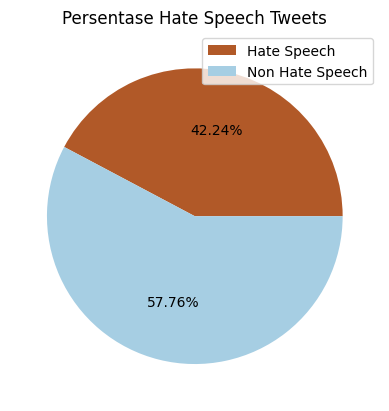

In [48]:
df_mapping.groupby('HS').HS.count().plot(kind ="pie", title='Persentase Hate Speech Tweets', autopct='%.2f%%', labels=None, ylabel='', legend=True, colormap='Paired_r')

In [49]:
df_mapping.groupby('HS').HS.count()[0]

5501

<Axes: title={'center': 'Persentase Hate Speech Tweets'}, xlabel='Jenis Tweets', ylabel='Jumlah Tweets'>

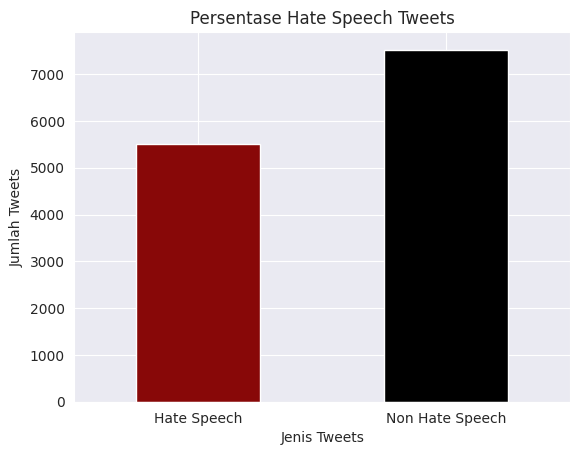

In [50]:
sns.set_style("darkgrid")

df_mapping.groupby('HS').HS.count().plot(
    kind="bar",
    title='Persentase Hate Speech Tweets',
    rot=0,
    xlabel='Jenis Tweets',
    ylabel='Jumlah Tweets',
    color=['#880808', '#000000']
)

###Persentase Abusive

<Axes: title={'center': 'Persentase Abusive Tweets'}>

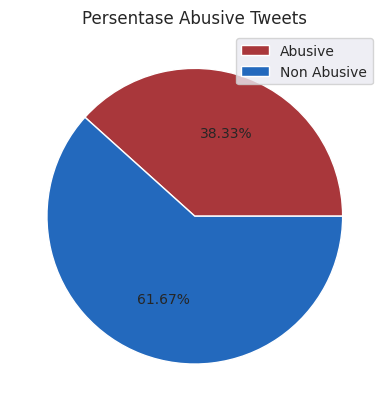

In [51]:
df_mapping.groupby('Abusive').Abusive.count().plot(kind ="pie", title='Persentase Abusive Tweets', autopct='%.2f%%', labels=None, ylabel='', legend=True, colormap='vlag_r')

<Axes: title={'center': 'Perbandingan Abusive dengan Non Abusive Tweets'}, xlabel='Jenis Tweets', ylabel='Jumlah Tweets'>

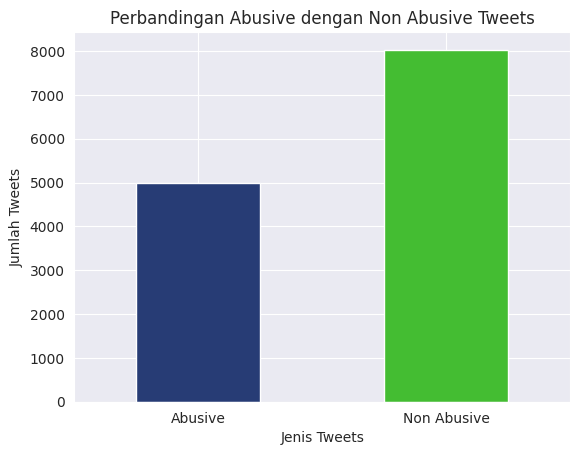

In [52]:
sns.set_style("darkgrid")

df_mapping.groupby('Abusive').Abusive.count().plot(
    kind="bar",
    title='Perbandingan Abusive dengan Non Abusive Tweets',
    rot=0,
    xlabel='Jenis Tweets',
    ylabel='Jumlah Tweets',
    color=['#273c75', '#44bd32']
)

In [96]:
column_categories = df_data_edit.columns[6:11]
column_categories

Index(['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other'], dtype='object')

In [97]:
total_categories = df_data_edit.iloc[:, 6:11].sum()
total_categories

HS_Religion     785
HS_Race         562
HS_Physical     319
HS_Gender       303
HS_Other       3696
dtype: int64

In [98]:
df_category = pd.DataFrame({'Kategori':column_categories, 'Total':total_categories})
df_category.reset_index(drop=True)

,Kategori,Total
0,HS_Religion,785
1,HS_Race,562
2,HS_Physical,319
3,HS_Gender,303
4,HS_Other,3696


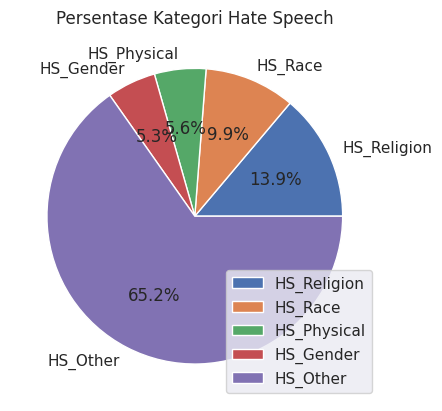

In [99]:
colors = sns.color_palette('deep')[0:5]
plt.pie(df_category['Total'], labels = df_category['Kategori'], colors = colors, autopct='%.1f%%')
plt.legend(loc="lower right")
plt.title('Persentase Kategori Hate Speech')
plt.show()

<Axes: title={'center': 'Perbandingan Abusive dengan Non Abusive Tweets'}, xlabel='Jenis Tweets', ylabel='Jumlah Tweets'>

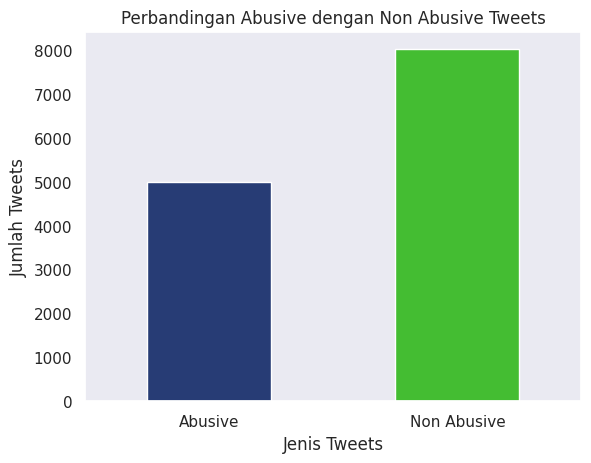

In [100]:
sns.set_style("dark")

df_mapping.groupby('Abusive').Abusive.count().plot(
    kind="bar",
    title='Perbandingan Abusive dengan Non Abusive Tweets',
    rot=0,
    xlabel='Jenis Tweets',
    ylabel='Jumlah Tweets',
    color=['#273c75', '#44bd32']
)

###Persentase Tujuan Hate Speech

In [87]:
total_type = df_data_edit.iloc[:, 4:6].sum()
total_type

HS_Individual    3528
HS_Group         1973
dtype: int64

In [86]:
column_type = df_data_edit.columns[4:6]
column_type

Index(['HS_Individual', 'HS_Group'], dtype='object')

In [88]:
df_type = pd.DataFrame({"Kategori": column_type, "Total":total_type})
df_type.reset_index(drop=True)

,Kategori,Total
0,HS_Individual,3528
1,HS_Group,1973


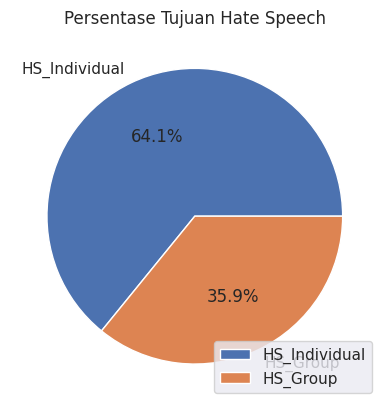

In [89]:
colors = sns.color_palette('deep')[0:5]
plt.pie(df_type['Total'], labels = df_type['Kategori'], colors = colors, autopct='%.1f%%')
plt.legend(loc="lower right")
plt.title('Persentase Tujuan Hate Speech')
plt.show()

###Persentase Intensitas Hate Speech

In [92]:
column_intensity = df_data_edit.columns[11:14]
column_intensity

Index(['HS_Weak', 'HS_Moderate', 'HS_Strong'], dtype='object')

In [93]:
total_intensity = df_data_edit.iloc[:, 11:14].sum()
total_intensity

HS_Weak        3336
HS_Moderate    1694
HS_Strong       471
dtype: int64

In [94]:
df_intensity = pd.DataFrame({'Intensitas':column_intensity, 'Total':total_intensity})
df_intensity.reset_index(drop=True)

,Intensitas,Total
0,HS_Weak,3336
1,HS_Moderate,1694
2,HS_Strong,471


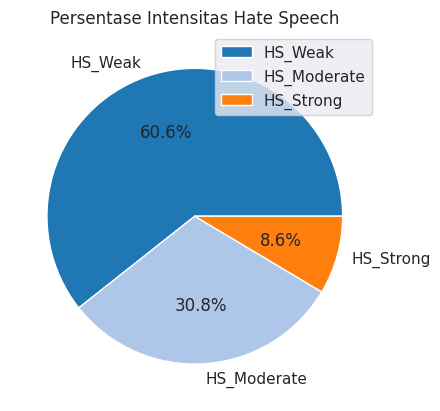

In [95]:
colors = sns.color_palette('tab20')[0:4]
plt.pie(df_intensity['Total'], labels = df_intensity['Intensitas'], colors = colors, autopct='%.1f%%')
plt.legend(loc="upper right")
plt.title('Persentase Intensitas Hate Speech')
plt.show()

In [62]:
hs_1_abusive_1 = len(df_mapping[(df_mapping['HS'] == 'Hate Speech') & (df_mapping['Abusive'] == 'Abusive')])
hs_0_abusive_0 = len(df_mapping[(df_mapping['HS'] == 'Non Hate Speech') & (df_mapping['Abusive'] == 'Non Abusive')])
hs_0_abusive_1 = len(df_mapping[(df_mapping['HS'] == 'Non Hate Speech') & (df_mapping['Abusive'] == 'Abusive')])
hs_1_abusive_0 = len(df_mapping[(df_mapping['HS'] == 'Hate Speech') & (df_mapping['Abusive'] == 'Non Abusive')])

hs_0_abusive_0

5780

###Perbandingan Hate Speech Terhadap Abusive

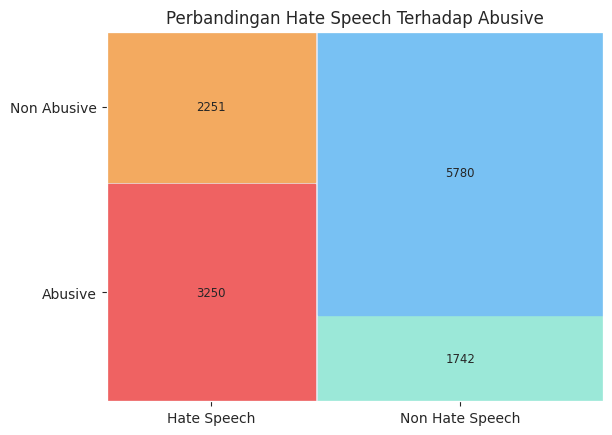

In [63]:
cols = {('Hate Speech', 'Abusive'):'#EF6262',('Non Hate Speech', 'Abusive'):'#9BE8D8',
        ('Non Hate Speech','Non Abusive' ):'#78C1F3', ('Hate Speech', 'Non Abusive'):'#F3AA60'}

labelizer=lambda k:{('Hate Speech','Abusive'):hs_1_abusive_1,('Non Hate Speech','Non Abusive'):hs_0_abusive_0,('Non Hate Speech','Abusive'):hs_0_abusive_1,('Hate Speech','Non Abusive'):hs_1_abusive_0}[k]
mosaic(df_mapping,['HS','Abusive'],labelizer=labelizer,properties=lambda key: {'color': cols[key]}, title='Perbandingan Hate Speech Terhadap Abusive')
plt.show()

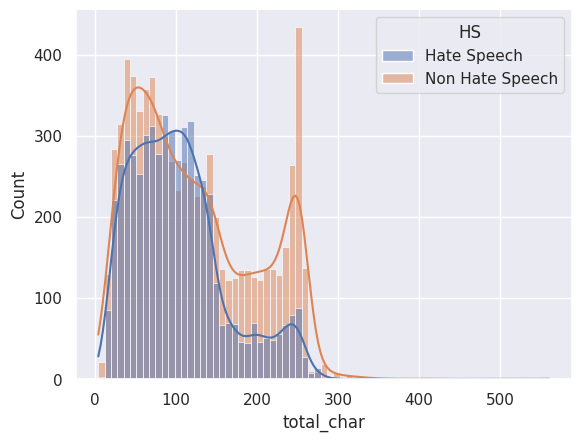

In [64]:
sns.set(style="darkgrid")

sns.histplot(data=df_mapping, x="total_char", kde=True, hue='HS')
plt.show()

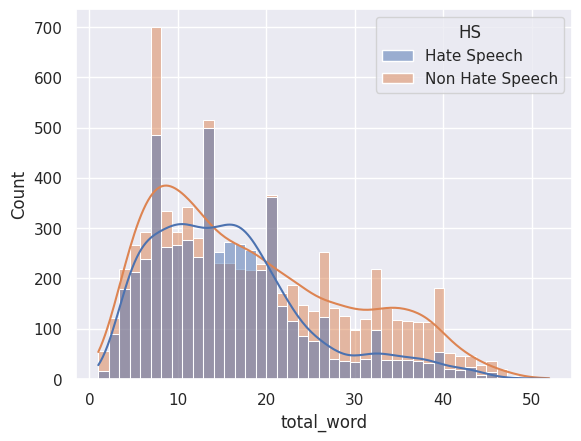

In [65]:
sns.set(style="darkgrid")

sns.histplot(data=df_mapping, x="total_word", kde=True, hue='HS')
plt.show()

### Wordcloud Hate Speech

####Individual

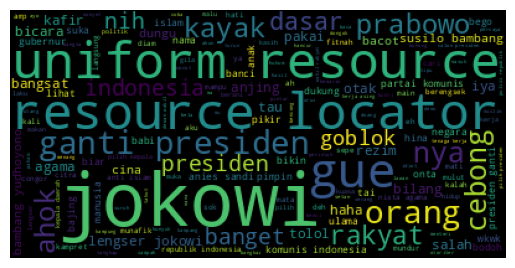

In [66]:
individual_hs = df_data_edit[(df_data_edit['HS'] == 1) & (df_data_edit['HS_Individual'] == 1)]

from wordcloud import WordCloud
text = ' '.join(individual_hs['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

####Group

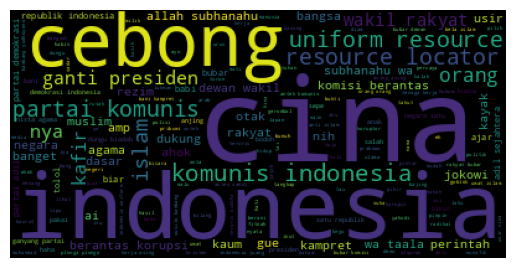

In [67]:
group_hs = df_data_edit[(df_data_edit['HS'] == 1) & (df_data_edit['HS_Group'] == 1)]

text = ' '.join(group_hs['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

####Religion

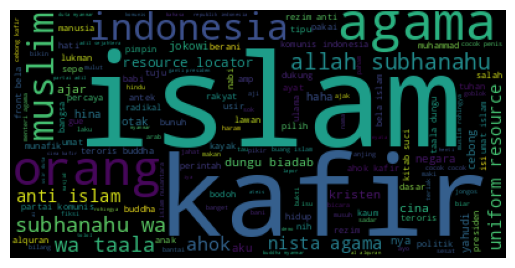

In [68]:
religion_hs = df_data_edit[(df_data_edit['HS'] == 1) & (df_data_edit['HS_Religion'] == 1)]

text = ' '.join(religion_hs['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

####Race

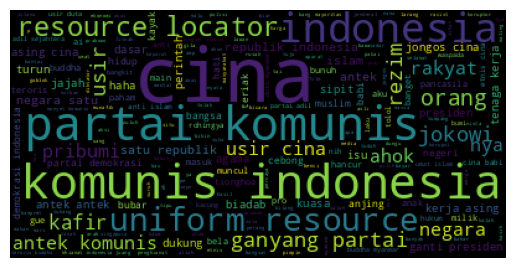

In [69]:
race_hs = df_data_edit[(df_data_edit['HS'] == 1) & (df_data_edit['HS_Race'] == 1)]

text = ' '.join(race_hs['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

####Physical

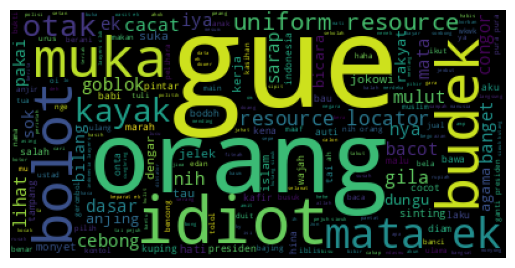

In [70]:
physical_hs = df_data_edit[(df_data_edit['HS'] == 1) & (df_data_edit['HS_Physical'] == 1)]

text = ' '.join(physical_hs['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

####Gender

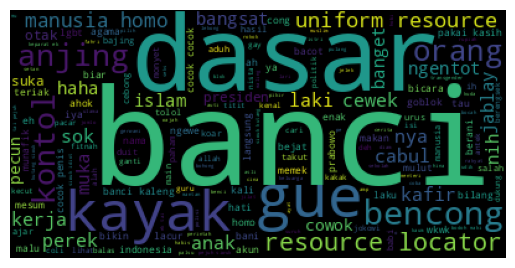

In [71]:
gender_hs = df_data_edit[(df_data_edit['HS'] == 1) & (df_data_edit['HS_Gender'] == 1)]

text = ' '.join(gender_hs['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Bivariate Analysis

<ipython-input-101-da05f52ea741>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_data_edit.iloc[:, 3:14].corr().round(2)


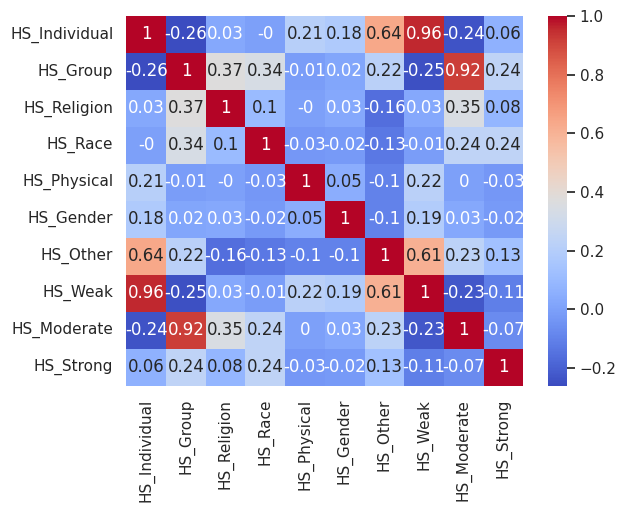

In [101]:
corr = df_data_edit.iloc[:, 3:14].corr().round(2)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

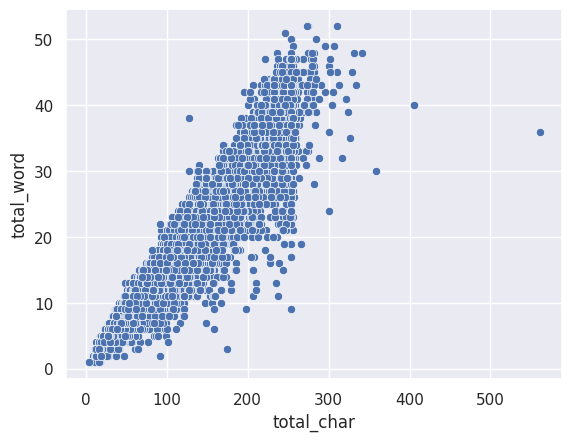

In [73]:
sns.scatterplot(data=df_data_edit, x='total_char', y='total_word')
plt.show()